In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
ds = pd.read_csv("SunCountry_data/SunCountry.csv", parse_dates=["PNRCreateDate", "ServiceStartDate", "EnrollDate"],
                 dtype={'ServiceStartCity':'string', 'ServiceEndCity':'string', 'PostalCode':'string', 'BookingChannel':'string',
                        'MarketingFlightNbr':'Int64', 'UFlyRewardsNumber':'Int64', 'UflyMemberStatus':'string'},
                 na_values={'MarketingFlightNbr':"OPEN"})

In [ ]:
df = ds.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3435388 entries, 0 to 3435387
Data columns (total 26 columns):
 #   Column                Dtype         
---  ------                -----         
 0   PNRLocatorID          object        
 1   TicketNum             int64         
 2   CouponSeqNbr          int64         
 3   ServiceStartCity      string        
 4   ServiceEndCity        string        
 5   PNRCreateDate         datetime64[ns]
 6   ServiceStartDate      datetime64[ns]
 7   PaxName               object        
 8   EncryptedName         object        
 9   GenderCode            object        
 10  birthdateid           float64       
 11  Age                   float64       
 12  PostalCode            string        
 13  BkdClassOfService     object        
 14  TrvldClassOfService   object        
 15  BookingChannel        string        
 16  BaseFareAmt           float64       
 17  TotalDocAmt           float64       
 18  UFlyRewardsNumber     Int64         
 19  

In [ ]:
df.head()

,PNRLocatorID,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PNRCreateDate,ServiceStartDate,PaxName,EncryptedName,GenderCode,...,BaseFareAmt,TotalDocAmt,UFlyRewardsNumber,UflyMemberStatus,CardHolder,BookedProduct,EnrollDate,MarketingFlightNbr,MarketingAirlineCode,StopoverCode
0,AAABJK,3377365159634,2,JFK,MSP,2013-11-23,2013-12-13,BRUMSA,4252554D4241434B44696420493F7C2067657420746869...,F,...,234.20,0.0,<NA>,<NA>,NaN,CHEOPQ,NaT,244,SY,O
1,AAABJK,3377365159634,1,MSP,JFK,2013-11-23,2013-12-08,BRUMSA,4252554D4241434B44696420493F7C2067657420746869...,F,...,234.20,0.0,<NA>,<NA>,NaN,CHEOPQ,NaT,243,SY,NaN
2,AAABMK,3372107381942,2,MSP,SFO,2014-02-04,2014-02-23,EILDRY,45494C4445525344696420493F7C206765742074686973...,M,...,293.96,338.0,<NA>,<NA>,NaN,NaN,NaT,397,SY,O
3,AAABMK,3372107381942,1,SFO,MSP,2014-02-04,2014-02-20,EILDRY,45494C4445525344696420493F7C206765742074686973...,M,...,293.96,338.0,<NA>,<NA>,NaN,NaN,NaT,392,SY,NaN
4,AAABTP,3372107470782,1,MCO,MSP,2014-03-13,2014-04-23,SKELMA,534B454C544F4E44696420493F7C206765742074686973...,F,...,112.56,132.0,<NA>,<NA>,NaN,NaN,NaT,342,SY,NaN


In [ ]:
df.MarketingAirlineCode.value_counts()

SY    3430350
F9       3319
HA       1705
FI         13
DE          1
Name: MarketingAirlineCode, dtype: int64

In [ ]:
df = df.loc[df.MarketingAirlineCode == 'SY']

In [ ]:
df.shape

(3430350, 26)

In [ ]:
df.head(20)

,PNRLocatorID,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PNRCreateDate,ServiceStartDate,PaxName,EncryptedName,GenderCode,...,BaseFareAmt,TotalDocAmt,UFlyRewardsNumber,UflyMemberStatus,CardHolder,BookedProduct,EnrollDate,MarketingFlightNbr,MarketingAirlineCode,StopoverCode
0,AAABJK,3377365159634,2,JFK,MSP,2013-11-23,2013-12-13,BRUMSA,4252554D4241434B44696420493F7C2067657420746869...,F,...,234.20,0.0,<NA>,<NA>,NaN,CHEOPQ,NaT,244,SY,O
1,AAABJK,3377365159634,1,MSP,JFK,2013-11-23,2013-12-08,BRUMSA,4252554D4241434B44696420493F7C2067657420746869...,F,...,234.20,0.0,<NA>,<NA>,NaN,CHEOPQ,NaT,243,SY,NaN
2,AAABMK,3372107381942,2,MSP,SFO,2014-02-04,2014-02-23,EILDRY,45494C4445525344696420493F7C206765742074686973...,M,...,293.96,338.0,<NA>,<NA>,NaN,NaN,NaT,397,SY,O
3,AAABMK,3372107381942,1,SFO,MSP,2014-02-04,2014-02-20,EILDRY,45494C4445525344696420493F7C206765742074686973...,M,...,293.96,338.0,<NA>,<NA>,NaN,NaN,NaT,392,SY,NaN
4,AAABTP,3372107470782,1,MCO,MSP,2014-03-13,2014-04-23,SKELMA,534B454C544F4E44696420493F7C206765742074686973...,F,...,112.56,132.0,<NA>,<NA>,NaN,NaN,NaT,342,SY,NaN
5,AAACLY,3372106417509,1,PSP,MSP,2012-10-06,2013-02-12,HINZRI,48494E5A4544696420493F7C2067657420746869732072...,M,...,171.16,194.8,<NA>,<NA>,NaN,NaN,NaT,610,SY,NaN
6,AAACWU,3372107969827,1,JFK,MSP,2014-10-21,2014-11-14,GIBAJU,47494241534A4F4E455344696420493F7C206765742074...,F,...,164.65,191.1,<NA>,<NA>,NaN,SSWMIR,NaT,244,SY,NaN
7,AAACWU,3372107969828,1,JFK,MSP,2014-10-21,2014-11-14,GIBAAL,474942415344696420493F7C2067657420746869732072...,M,...,164.65,191.1,<NA>,<NA>,NaN,SSWMIR,NaT,244,SY,NaN
8,AAAEGK,3372107645570,1,MCO,MSP,2014-06-04,2014-06-05,LITKKE,4C49544B45545444696420493F7C206765742074686973...,M,...,0.00,0.0,<NA>,<NA>,NaN,SALCL,NaT,342,SY,NaN
9,AAAEGW,3372107310126,1,RSW,MSP,2014-01-07,2014-02-10,SMITED,534D49544844696420493F7C2067657420746869732072...,M,...,81.86,99.0,202369882,Standard,False,NaN,2010-03-04 10:50:43,384,SY,NaN


In [ ]:
df.loc[(df.BookingChannel != "Outside Booking") & (df.BookingChannel != "Reservations Booking") & (df.BookingChannel != "SY Vacation") & (df.BookingChannel != "Tour Operator Portal") & (df.BookingChannel != "SCA Website Booking"),"BookingChannel"] ="Airport"
df.head()

<BarContainer object of 12 artists>

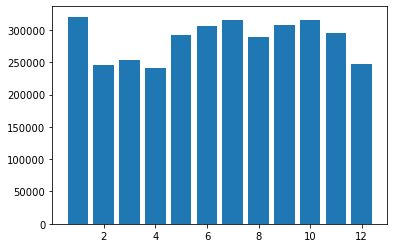

In [ ]:
val = df.PNRCreateDate.dt.month.value_counts()
plt.bar(x=val.index, height=val.values)

<BarContainer object of 12 artists>

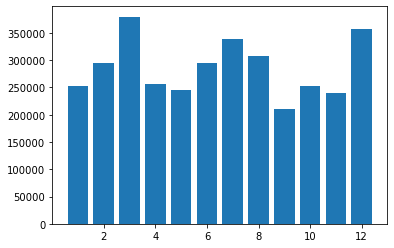

In [ ]:
val = df.ServiceStartDate.dt.month.value_counts()
plt.bar(x=val.index, height=val.values)

In [ ]:
df.ServiceStartDate.dt.year.value_counts()

2014    1859353
2013    1570997
Name: ServiceStartDate, dtype: int64

<AxesSubplot:>

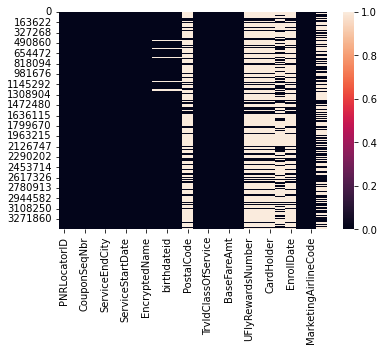

In [ ]:
sns.heatmap(df.isna())

In [ ]:
df.loc[(df.TotalDocAmt == 0.0) | (df.TotalDocAmt < df.BaseFareAmt)].shape[0] / df.shape[0]

0.11762764732461702

In [ ]:
df.loc[df.TotalDocAmt >= df.BaseFareAmt].shape[0] / df.shape[0]

0.9582342909615637

In [ ]:
df.loc[df.BkdClassOfService != df.TrvldClassOfService, 'GenderCode'].value_counts()

M    88844
F    81006
U        2
Name: GenderCode, dtype: int64

This groupby/aggregation cell will take 5-10 minutes to finish running!

In [ ]:
df_ind = df.groupby('EncryptedName').agg({'GenderCode':'last', 'Age':'max', 'TicketNum':'count',
                                          'BkdClassOfService': lambda x: pd.Series.mode(x)[0],
                                          'BookingChannel': lambda x: pd.Series.mode(x)[0],
                                          'UflyMemberStatus': 'max',
                                          'BaseFareAmt': 'mean'}).reset_index()

In [ ]:
df_ind.head(10)

,EncryptedName,GenderCode,Age,TicketNum,BkdClassOfService,BookingChannel,UflyMemberStatus,BaseFareAmt
0,4120414C52484D414E44696420493F7C20676574207468...,M,33.0,1,Coach,SCA Website Booking,<NA>,151.630
1,414142454C44696420493F7C2067657420746869732072...,M,24.0,1,Coach,Outside Booking,<NA>,205.580
2,4141424552472042524F4F4B5344696420493F7C206765...,F,54.0,1,Coach,LAS,<NA>,264.190
3,41414245524744696420493F7C20676574207468697320...,M,52.0,2,Coach,Tour Operator Portal,<NA>,0.000
4,41414245524744696420493F7C20676574207468697320...,M,29.0,2,Coach,Outside Booking,Standard,432.560
5,41414245524744696420493F7C20676574207468697320...,M,50.0,1,Coach,LAS,<NA>,264.190
6,41414245524744696420493F7C20676574207468697320...,F,41.0,2,Coach,SCA Website Booking,<NA>,89.300
7,41414245524744696420493F7C20676574207468697320...,F,42.0,2,Coach,Tour Operator Portal,<NA>,0.000
8,41414245524744696420493F7C20676574207468697320...,M,41.0,2,Coach,SCA Website Booking,<NA>,256.740
9,41414245524744696420493F7C20676574207468697320...,F,48.0,4,Coach,SCA Website Booking,<NA>,299.995


In [ ]:
df_ind.shape

(1256610, 11)

In [ ]:
df_ind.BookingChannel.value_counts()

Outside Booking         602603
SCA Website Booking     513012
Reservations Booking     53343
Tour Operator Portal     51544
SY Vacation              31704
MSP                       1867
FCM                       1043
DFW                        270
LAX                        215
XTM                        156
JFK                        144
MKE                        126
MDW                        109
LAS                        106
UFO                        101
LAN                         71
RSW                         53
SFO                         52
SEA                         19
PHX                         17
PSP                         16
HRL                         13
MCO                         10
DCA                          6
ANC                          6
BOS                          1
MIA                          1
GJT                          1
MSN                          1
Name: BookingChannel, dtype: Int64

In [ ]:
df_ind.describe()

,Age,TicketNum,BaseFareAmt,TotalDocAmt
count,1.443388e+06,1.448687e+06,1.448687e+06,1.448687e+06
mean,3.985506e+01,2.367903e+00,2.729941e+02,2.978410e+02
std,1.960907e+01,1.889404e+00,1.723675e+02,2.026019e+02
min,-2.883000e+03,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.500000e+01,2.000000e+00,1.637200e+02,1.762000e+02
50%,3.900000e+01,2.000000e+00,2.567400e+02,2.858000e+02
75%,5.500000e+01,2.000000e+00,3.534900e+02,3.951000e+02
max,2.012000e+03,1.320000e+02,4.342000e+03,1.757200e+04


In [ ]:
df_ind = df_ind.loc[(df_ind.Age > 0) & (df_ind.Age < 100)]

In [ ]:
df_ind.loc[df_ind.UflyMemberStatus.isna(), 'UflyMemberStatus'] = 'Nonmember'

In [ ]:
rich_freq = df_ind.loc[(df_ind.TicketNum > 2) & (df_ind.BkdClassOfService != 'Coach')]
rich_freq.head()

,EncryptedName,GenderCode,Age,TicketNum,BkdClassOfService,BookingChannel,UflyMemberStatus,BaseFareAmt
53,41414645445444696420493F7C20676574207468697320...,M,71.0,4,First Class,SCA Website Booking,Nonmember,742.330
464,4141525448554E44696420493F7C206765742074686973...,F,70.0,4,First Class,SCA Website Booking,Nonmember,972.260
465,4141525448554E44696420493F7C206765742074686973...,F,69.0,4,First Class,SCA Website Booking,Nonmember,932.720
478,414153204A414B4F4253454E44696420493F7C20676574...,M,77.0,3,First Class,Reservations Booking,Standard,1187.890
613,4141534A414B4F4253454E44696420493F7C2067657420...,F,64.0,5,First Class,Reservations Booking,Standard,737.478


In [ ]:
df_ind

In [ ]:
print("Average age of first class frequent flyers: ", rich_freq.Age.mean())
print("Average age of sun country flyers: ", df_ind.Age.mean())

Average age of first class frequent flyers:  55.859372485921156
Average age of sun country flyers:  44.29556346042129


In [ ]:
df_ind.UflyMemberStatus.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Nonmember    81.7%
Standard     18.3%
Elite         0.1%
Name: UflyMemberStatus, dtype: object

In [ ]:
rich_freq.UflyMemberStatus.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Standard     61.2%
Nonmember    34.8%
Elite         4.0%
Name: UflyMemberStatus, dtype: object

In [ ]:
df_ind.GenderCode.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

F    52.6%
M    47.4%
U     0.0%
Name: GenderCode, dtype: object

In [ ]:
rich_freq.GenderCode.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

M    55.0%
F    45.0%
Name: GenderCode, dtype: object

In [ ]:
members = df_ind.loc[df_ind.UflyMemberStatus != "Nonmember"]
nonmems = df_ind.loc[df_ind.UflyMemberStatus == "Nonmember"]

In [ ]:
members_df = pd.DataFrame(data=[0,1], columns=['isMember'])
members_df.head()

,isMember
0,0
1,1


In [ ]:
members_df['age'] = [nonmems["Age"].mean(), members["Age"].mean()]
members_df.head()

,isMember,age
0,0,43.138362
1,1,49.448302


In [ ]:
members_df['sca booking'] = [nonmems["BookingChannel"].value_counts(normalize=True).loc['SCA Website Booking'], members["BookingChannel"].value_counts(normalize=True).loc['SCA Website Booking']]

In [ ]:
members_df['avg_base_fare'] = [nonmems['BaseFareAmt'].mean(), members['BaseFareAmt'].mean()]

In [ ]:
members_df.head()

,isMember,age,sca booking,avg_base_fare
0,0,43.138362,0.355433,266.932524
1,1,49.448302,0.643434,289.197319


In [ ]:
members_df['female_percent'] = [nonmems['GenderCode'].value_counts(normalize=True).loc['F'],members['GenderCode'].value_counts(normalize=True).loc['F']]

In [ ]:
# members_df.head()
members_df.age = members_df.age / members_df.age.sum()
members_df.avg_base_fare = members_df.avg_base_fare / members_df.avg_base_fare.sum()
members_df.head()

,isMember,age,sca booking,avg_base_fare,female_percent
0,0,0.465924,0.355433,0.479982,0.525706
1,1,0.534076,0.643434,0.520018,0.529937


In [ ]:
long_df = members_df.melt()
long_df = long_df.iloc[2:]
long_df["Member"] = ["non-member","member","non-member","member","non-member","member","non-member","member"]
long_df

,variable,value,Member
2,age,0.465924,non-member
3,age,0.534076,member
4,sca booking,0.355433,non-member
5,sca booking,0.643434,member
6,avg_base_fare,0.479982,non-member
7,avg_base_fare,0.520018,member
8,female_percent,0.525706,non-member
9,female_percent,0.529937,member


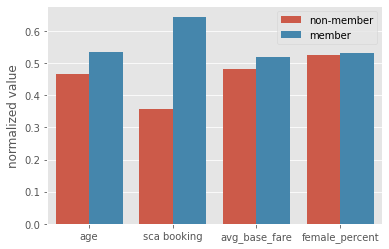

In [ ]:
plt.style.use("ggplot")

ax1 = sns.barplot(x='variable', y='value', hue='Member', data=long_df)
ax1.set_ylabel('normalized value')
ax1.set_xlabel(None)
ax1.legend()

In [ ]:
df_clustering = df_ind.drop(columns=['EncryptedName'])
df_clustering.head(10)

,GenderCode,Age,TicketNum,BkdClassOfService,BookingChannel,UflyMemberStatus,BaseFareAmt
0,M,33.0,1,Coach,SCA Website Booking,Nonmember,151.630
1,M,24.0,1,Coach,Outside Booking,Nonmember,205.580
2,F,54.0,1,Coach,LAS,Nonmember,264.190
3,M,52.0,2,Coach,Tour Operator Portal,Nonmember,0.000
4,M,29.0,2,Coach,Outside Booking,Standard,432.560
5,M,50.0,1,Coach,LAS,Nonmember,264.190
6,F,41.0,2,Coach,SCA Website Booking,Nonmember,89.300
7,F,42.0,2,Coach,Tour Operator Portal,Nonmember,0.000
8,M,41.0,2,Coach,SCA Website Booking,Nonmember,256.740
9,F,48.0,4,Coach,SCA Website Booking,Nonmember,299.995


In [ ]:
df_clustering.loc[(df_clustering.BookingChannel != "Outside Booking") & (df_clustering.BookingChannel != "Reservations Booking") & (df_clustering.BookingChannel != "SY Vacation") & (df_clustering.BookingChannel != "Tour Operator Portal") & (df_clustering.BookingChannel != "SCA Website Booking"),"BookingChannel"] ="Airport"
df_clustering.head(20)

,GenderCode,Age,TicketNum,BkdClassOfService,BookingChannel,UflyMemberStatus,BaseFareAmt
0,M,33.0,1,Coach,SCA Website Booking,Nonmember,151.630
1,M,24.0,1,Coach,Outside Booking,Nonmember,205.580
2,F,54.0,1,Coach,Airport,Nonmember,264.190
3,M,52.0,2,Coach,Tour Operator Portal,Nonmember,0.000
4,M,29.0,2,Coach,Outside Booking,Standard,432.560
5,M,50.0,1,Coach,Airport,Nonmember,264.190
6,F,41.0,2,Coach,SCA Website Booking,Nonmember,89.300
7,F,42.0,2,Coach,Tour Operator Portal,Nonmember,0.000
8,M,41.0,2,Coach,SCA Website Booking,Nonmember,256.740
9,F,48.0,4,Coach,SCA Website Booking,Nonmember,299.995


In [ ]:
df_clustering.loc[df_clustering.BaseFareAmt == 0.0].shape[0] / df_clustering.shape[0]

0.07861388975099673

In [ ]:
df_clustering.shape

(1256610, 7)

In [ ]:
df_clust_sample = df_clustering.sample(n=250000, random_state=42)
df_clust_sample.head()

,GenderCode,Age,TicketNum,BkdClassOfService,BookingChannel,UflyMemberStatus,BaseFareAmt
909033,F,33.0,1,Coach,Outside Booking,Nonmember,247.44
380637,M,35.0,1,Coach,Outside Booking,Nonmember,337.67
705180,M,25.0,1,Coach,SCA Website Booking,Nonmember,238.14
883523,M,30.0,2,Coach,Outside Booking,Nonmember,254.88
913691,F,43.0,2,Coach,Outside Booking,Standard,238.14


In [ ]:
df_clust_sample.shape

(250000, 7)

In [ ]:
df_clust_sample.to_csv("clustering_data.csv")